In [85]:
from rdkit.Chem import Draw
from rdkit import Chem

In [101]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole


In [3]:
IPythonConsole.molSize = 500,500
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.minFontSize=15
IPythonConsole.drawOptions.bondLineWidth=2

In [13]:
mol = Chem.MolFromSmiles("c1c[nH]c(CN2CCc3ccccc3C2)c1")
k777 = Chem.MolFromSmiles("CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C/S(=O)(=O)c2ccccc2)CCc2ccccc2)CC1")
odn = Chem.MolFromSmiles("CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1")

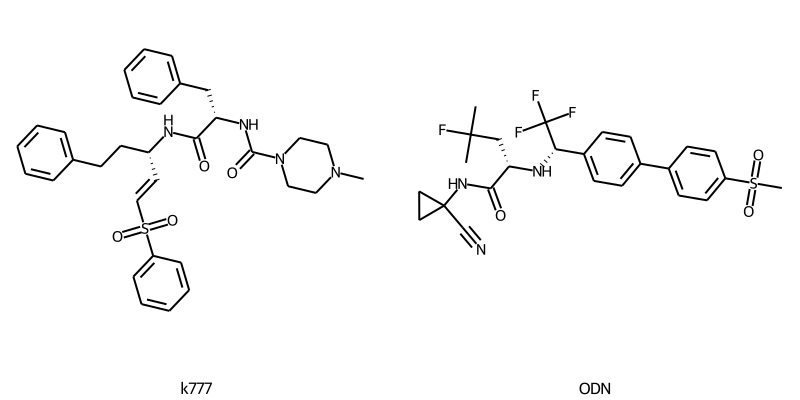

In [82]:
imagem = Chem.Draw.MolsToGridImage([k777, odn], legends=["k777", "ODN"], subImgSize=(400,400),returnPNG=False,molsPerRow=2)
imagem

In [83]:
imagem.save("imagens/ligantes_k777_odn.png")

In [40]:
import pandas as pd
import sqlite3

In [41]:
con_odn = sqlite3.connect("../data/ligantes_odn.db")
con_k777 = sqlite3.connect("../data/ligantes_k777.db")

In [42]:
novos_ligantes_odn = pd.read_sql("select * from novos_ligantes", con_odn)

In [43]:
novos_ligantes_odn

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(...,5.28070,94.02,539.262043,0.262463,5,2,0.118493,0.35
1,N#Cc1ccc(C(CN2CCCCCCC2=O)NCC2(NC(=O)c3ccc(Cl)c...,4.84158,108.29,535.248142,0.502449,5,2,0.184731,0.40
2,CSCCC(NC(=O)C1CCCCN1C(=O)COc1c(C2CCCCC2)ccc2cc...,4.96990,95.94,526.250143,0.453882,5,2,0.009038,0.36
3,CCc1cc(-c2ncc(C(=O)Nc3ccc(CC(=O)NC4CCCN(C(C)=O...,4.54992,100.63,528.273656,0.446852,5,2,0.000647,0.37
4,CC(C)=CC(=O)N1CCC(N2CC(CC#N)(n3ccc(-c4cc(C)c5[...,4.24890,109.10,528.332508,0.482673,6,2,0.004814,0.37
...,...,...,...,...,...,...,...,...,...
22501,CCCOc1ccc(C)cc1NC(=O)N1CCN(C(=O)c2c(C)cccc2O)C...,4.96814,99.18,529.257671,0.450416,5,2,0.000335,0.38
22502,CC(=O)c1cccc(NC(=O)NC(CC2CCCCC2)C(=O)N2CCC(=O)...,4.91922,98.82,532.304956,0.471684,4,2,0.003887,0.40
22503,CC(C)Oc1ccc(C(=O)N2CCC(C(=O)Nc3ccc(NC(=O)Cc4cc...,5.28500,87.74,517.237685,0.425390,4,2,0.000996,0.30
22504,CC(C)CC(=O)Nc1ccc2c(c1)C(=O)N(C(C)CO)CC(C)C(CN...,4.57120,99.18,523.304621,0.501669,5,2,0.004950,0.35


In [127]:
seis_primeiros_ligs_odn = novos_ligantes_odn.loc[novos_ligantes_odn.Smiles.str.contains("#")].sort_values(by='i_tanimoto', ascending=False).iloc[:3,:]
seis_primeiros_ligs_odn

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
18583,CC(NC(=O)C(NC=O)C1CCCCC1)c1cccc(-c2cncc(C#Cc3c...,4.42400,105.23,543.219178,0.323224,5,2,0.034135,0.51
1643,CS(=O)(=O)c1cc(Cl)c(Cl)cc1-c1ccc(CC(C#N)NC(=O)...,4.32928,99.06,527.083718,0.496508,5,2,0.032758,0.51
16886,N#CC1(NC(=O)C2CCCN2Cc2ccc(-c3c[nH]c(=NC(=O)CC4...,4.50108,101.35,525.219846,0.452118,5,2,0.143816,0.49


In [128]:
seis_primeiros_ligs_odn = seis_primeiros_ligs_odn.to_numpy().tolist()

In [129]:
elementos_odn = [Chem.MolFromSmiles(elemento[0]) for elemento in seis_primeiros_ligs_odn]
prob_odn = [f"Indice de Tanimoto: {elemento[-1] * 100}%" for elemento in seis_primeiros_ligs_odn]             

In [130]:
IPythonConsole.drawOptions.minFontSize=10
IPythonConsole.drawOptions.bondLineWidth=2

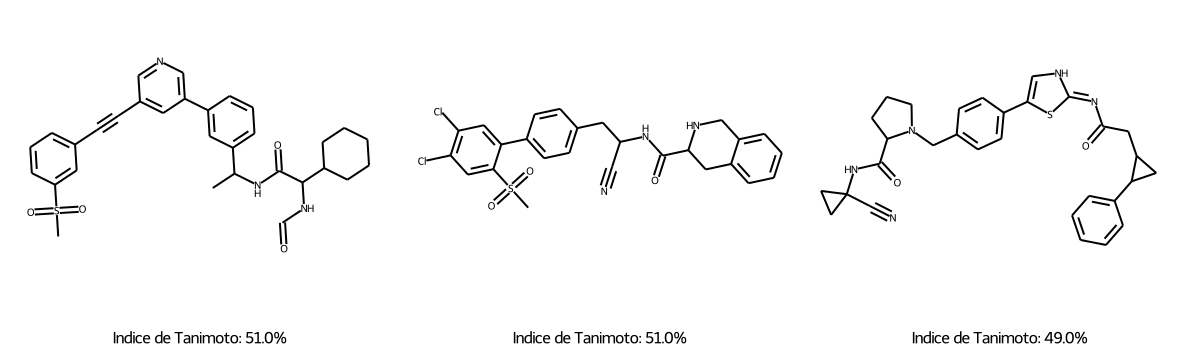

In [144]:
imagem_ligs_odn = Chem.Draw.MolsToGridImage(elementos_odn, legends=prob_odn,subImgSize=(400,350),returnPNG=False, molsPerRow=3)
imagem_ligs_odn

In [145]:
imagem_ligs_odn.save("imagens/odn_ligs.png")

In [133]:
novos_ligantes_k777 = pd.read_sql("select * from novos_ligantes", con_k777)
novos_ligantes_k777

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1c(CC(=O)NC(Cc2ccc(C(F)(F)F)cc2)C(O)CS(=O)(...,4.23610,92.70,575.120113,0.278952,5,2,0.003091,0.40
1,CCCC1CN(C(=O)c2cccc(S(=O)(=O)N3CCC(C(=O)NCCCc4...,3.70380,98.82,574.238054,0.421642,5,2,0.002801,0.39
2,CN(Cc1cc[n+](C)cc1)c1ccc(C(=O)N2CCCC(CNC(=O)C(...,3.73998,100.55,580.253001,0.395779,5,2,0.002127,0.31
3,CNC(C)C(=O)Nc1ccc(N2CCN(C(=O)C=Cc3ccc(CN(C)C(=...,4.18620,84.99,567.320940,0.339758,5,2,0.001688,0.34
4,CCN(CC)CCCNC(=O)C1(C(F)(F)F)CN(S(=O)(=O)c2ccc3...,3.77180,98.82,584.264411,0.414629,5,2,0.002927,0.32
...,...,...,...,...,...,...,...,...,...
22409,CSCC(C(=O)NC(CSC(F)(F)F)C(=O)C(CC(C)C)N=c1cccc...,3.19780,111.70,576.205182,0.275689,7,2,0.000643,0.29
22410,C#CCNC(=O)C(CCc1ccc(Cl)cc1Cl)NC(=O)C1CCCN(C(=O...,3.72252,96.33,571.211695,0.299510,5,2,0.002503,0.38
22411,CCN(Cc1ccc(CC(=O)NC(=O)C2CSCN2C(=O)C(CO)Cc2ccc...,3.55340,107.02,579.276692,0.421826,6,2,0.002132,0.39
22412,O=C(COc1ccc(C2OC2C(=O)N2CCc3ccccc32)cc1)NCCCNC...,3.79340,100.27,577.121233,0.281884,5,2,0.005359,0.35


In [134]:
seis_primeiros_ligs_k777 = novos_ligantes_k777.loc[novos_ligantes_k777.Smiles.str.contains("#")].sort_values(by='i_tanimoto', ascending=False).iloc[:3,:]
seis_primeiros_ligs_k777

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
18129,C#Cc1ccc(CCNC(=O)C(C=CS(=O)(=O)c2ccc(F)cc2)N2C...,3.67160,98.82,574.205005,0.300307,5,2,0.003074,0.53
21291,CC(C)OCC#Cc1ccc(CC(NC(=O)C(NC(=O)N(C(C)C)C(C)(...,3.59230,100.21,570.378121,0.419073,5,2,0.006078,0.50
7673,CCCN(CC)C(=O)N1CCC(Cc2ccccc2)(CN2CC(CC(=O)NCC#...,3.21468,108.78,572.347489,0.379936,5,2,0.006052,0.50


In [135]:
seis_primeiros_ligs_k777 = seis_primeiros_ligs_k777.to_numpy().tolist()

In [136]:
elementos_k777 = [Chem.MolFromSmiles(elemento[0]) for elemento in seis_primeiros_ligs_k777]
prob_k777 = [f"Indice de Tanimoto: {elemento[-1] * 100}%" for elemento in seis_primeiros_ligs_odn]             

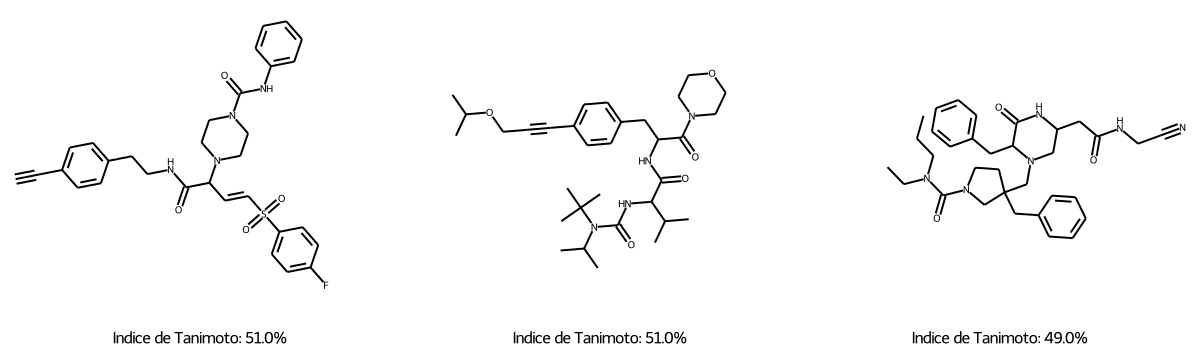

In [142]:
imagem_ligs_k777 = Chem.Draw.MolsToGridImage(elementos_k777, legends=prob_k777,subImgSize=(400,350),returnPNG=False)
imagem_ligs_k777

In [146]:
imagem_ligs_k777.save("imagens/k777_ligs.png")